Алексеев Константин БД-231м

## Практическая 4. Вариант 1. Анализ посещаемости спортивного зала.**

Исследуйте динамику посещаемости за последние 6 месяцев. Какова средняя частота посещений на клиента?


Будем использовать датасет с [кагла](https://www.kaggle.com/datasets/basicidea/gym-data-472mbah?select=data.csv)

Здесь показано по часам сколько было в текущий момент времени посетителей

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\User\anaconda3\envs\universal_env\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv('data.csv', delimiter=',')
df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


In [5]:
df['date'] = df['date'].apply(lambda x: x[0:19])
df['date'] = pd.to_datetime(df['date'])

In [6]:
start_date = df['date'].min()
end_date = df['date'].max()
print(f"Данные доступны за период {start_date} - {end_date}")

Данные доступны за период 2015-08-14 17:00:11 - 2017-03-18 19:22:51


In [7]:
last_6_months = df[df['date'] >= (end_date - pd.DateOffset(months=6))]
last_6_months['date_only'] = last_6_months['date'].dt.date

# Расчитаем среднее число посетителей в течение каждого дня
average_daily_attendance = last_6_months.groupby('date_only')['number_people'].mean().reset_index()

C:\Users\User\AppData\Local\Temp\ipykernel_8704\1275235434.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_6_months['date_only'] = last_6_months['date'].dt.date


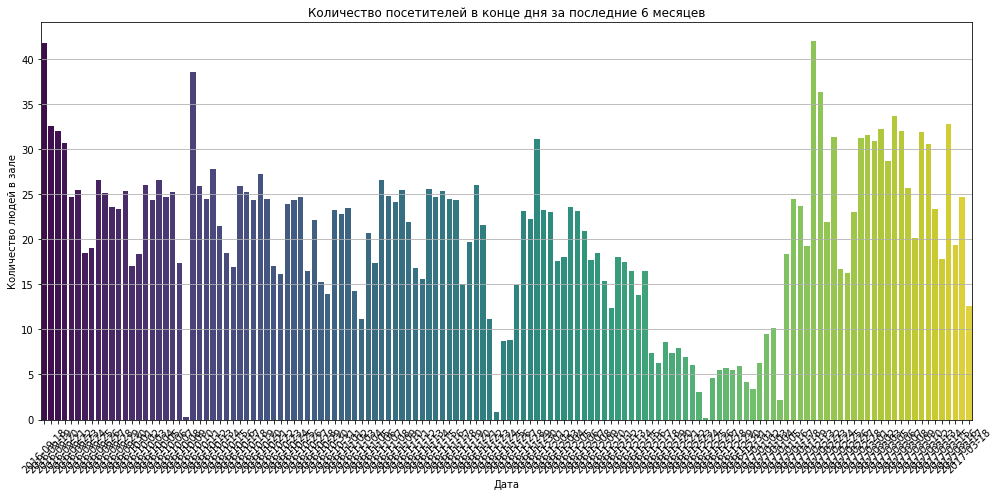

In [8]:
# Визуализация среднего числа  посетителей в течение дня
plt.figure(figsize=(14, 7))
sns.barplot(data=average_daily_attendance, x='date_only', y='number_people', palette='viridis')
plt.title('Количество посетителей в конце дня за последние 6 месяцев')
plt.xlabel('Дата')
plt.ylabel('Количество людей в зале')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

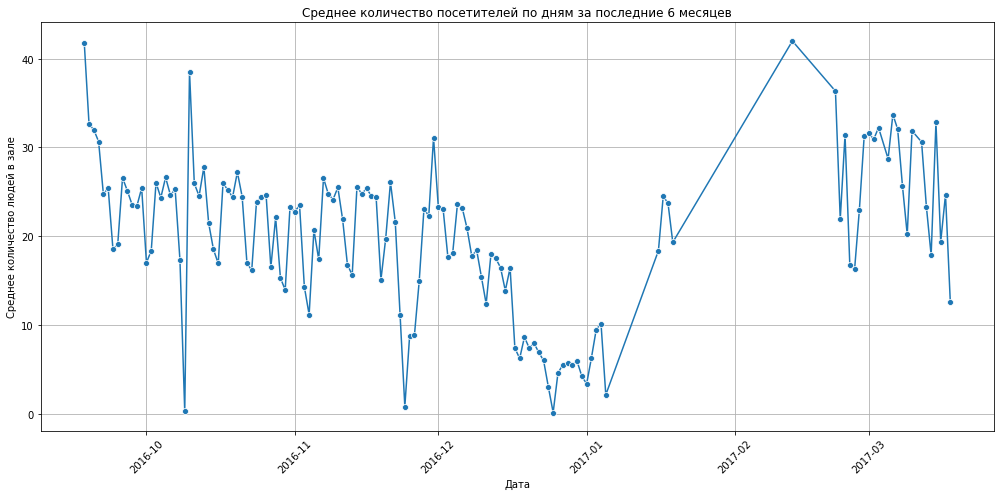

In [9]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=average_daily_attendance, x='date_only', y='number_people', marker='o')
plt.title('Среднее количество посетителей по дням за последние 6 месяцев')
plt.xlabel('Дата')
plt.ylabel('Среднее количество людей в зале')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [10]:

# Расчет общего среднего посещаемости за весь период
overall_average_visits = average_daily_attendance['number_people'].mean()
print(f'Общее среднее количество посетителей: {overall_average_visits:.2f}')

Общее среднее количество посетителей: 20.05


In [12]:
average_daily_attendance

,date_only,number_people
0,2016-09-18,41.814815
1,2016-09-19,32.632353
2,2016-09-20,32.000000
3,2016-09-21,30.671429
4,2016-09-22,24.725490
...,...,...
133,2017-03-14,17.841584
134,2017-03-15,32.831325
135,2017-03-16,19.394958
136,2017-03-17,24.691176


In [13]:
average_daily_attendance.to_csv('average_daily_attendance.csv')